11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/20
469/469 [==============================] - 11s 20ms/step - loss: 0.2493 - accuracy: 0.9249 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0996 - accuracy: 0.9688 - val_loss: 0.0830 - val_accuracy: 0.9751
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0725 - accuracy: 0.9766 - val_loss: 0.0715 - val_accuracy: 0.9785
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0677 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.0644 - val_accuracy: 0.9804
Epoch 6/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0658 - val_accuracy: 0.9801
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - lo

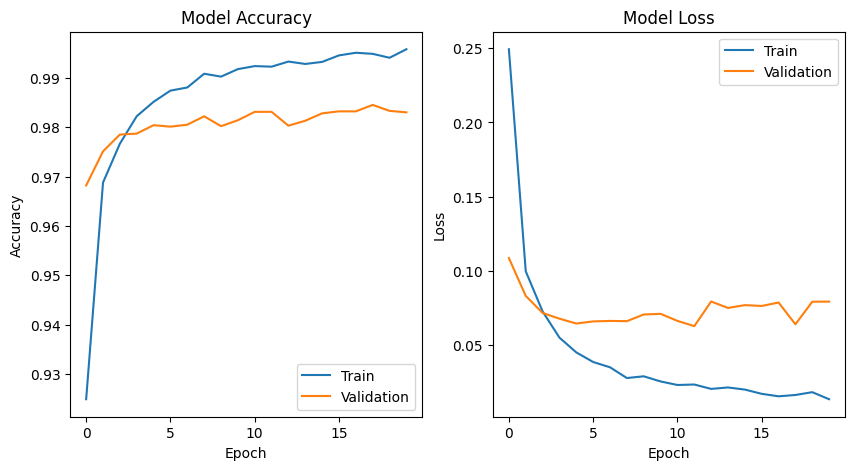

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model and record the training history
history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                    epochs=20, batch_size=128)

# plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()